In [1]:
import json
import ast

import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from tqdm.auto import tqdm
from scipy.stats import levene
import scipy.stats as st
import pylab
import statsmodels.stats.api as sms
import phik

import my_hypotheses as hyp
import LichessAnalys as li
import my_message as ms

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
lichessAnalys = li.LichessAnalys()
hypotheses = hyp.ProgressivePlayerCanBeACheater()
message_to_send = ms.MessageToSend()

In [3]:
df_for_test_group = pd.read_csv('./move_score_and_clocks.csv', sep=',')

In [4]:
df_for_test_group.head()

,date,game_id,time_control,clocks_list,move_count,user_id,move_score
0,2023-04-30,rgMLuvfQ,30+0,"[14.32, 2.48, 6.88, 3.52, 21.68, 4.56, 12.72, ...",47,alexboy14,"[0, 12, 16, 0, 0, 0, 0, -14, -1, 85, 53, 50, 4..."
1,2023-04-11,joT2BtwS,30+0,"[2.16, 2.56, 4.16, 3.36, 4.0, 9.36, 4.16, 16.3...",36,alexboy14,"[0, 28, 16, 0, 15, 31, 65, 60, 53, 59, 49, 61,..."
2,2023-04-09,77XWe6bN,30+0,"[2.32, 1.6, 0.0, 0.0, 0.72, 0.88, 0.88, 0.88, ...",26,alexboy14,"[36, 0, 25, 27, 21, 46, 50, 51, 45, 42, 46, 39..."
3,2023-04-05,nUbvmfgK,30+0,"[1.68, 1.52, 3.76, 9.12, 3.52, 1.68, 2.16, 16....",50,alexboy14,"[0, 29, 39, 0, 31, 45, 62, 56, 53, 68, 53, 21,..."
4,2023-04-03,tCPNyQdR,30+0,"[6.24, 3.44, 7.04, 1.52, 4.96, 13.92, 18.64, 5...",37,alexboy14,"[0, 16, 31, 24, 70, 50, -30, -19, -33, -72, -5..."


In [5]:
df_for_test_group['clocks_list'][0]

'[14.32, 2.48, 6.88, 3.52, 21.68, 4.56, 12.72, 101.04, 1.92, 9.36, 9.92, 5.92, 51.52, 8.16, 6.48, 5.52, 2.64, 29.28, 29.76, 5.12, 238.96, 88.8, 258.56, 0.96, 5.04, 68.32, 24.64, 2.64, 128.08, 1.2, 15.28, 135.28, 9.12, 20.16, 18.8, 2.48, 1.6, 92.72, 7.68, 3.52, 1.68, 4.32, 1.44, 0.32, 1.76, 5.0, 328.87]'

In [32]:
df_for_test_group['clocks_list_new'] = \
    [ast.literal_eval(i) for i in df_for_test_group['clocks_list']]
df_for_test_group['move_score_new'] = \

    [ast.literal_eval(i) for i in df_for_test_group['move_score']]

SyntaxError: invalid syntax (131319440.py, line 4)

In [21]:
test_group = df_for_test_group['clocks_list_new'][0]
# test_group = df_for_test_group['clocks_list_new'].explode('clocks_list_new')

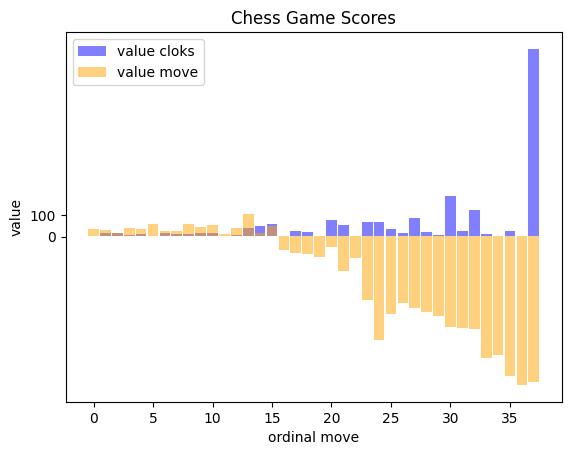

In [27]:
message_to_send.create_plot_eval_cloks(number_game=5)

In [9]:
def create_plot_eval_cloks(self, number_game):
    len_move = len(df['move_score_new'][number_game])
    max_score = max(df['move_score_new'][number_game])
    plt.bar(range(len_move), df['clocks_list_new'][number_game],
        color='blue',
        width=0.9,
        bottom=1,
        alpha=0.5)

    plt.bar(range(len_move), df['move_score_new'][number_game],
        color='orange',
        width=0.9,
        bottom=1,
        alpha=0.5)
    plt.legend(['value cloks', 'value move'])
    plt.xticks(np.arange(0,len_move,5))
    plt.yticks(np.arange(0,max_score,100))
    plt.ylabel('value')
    plt.xlabel('ordinal move')
    plt.title('Chess Game Scores')
    plt.savefig('sample_plot.png')

In [10]:
df_for_control_group = pd.read_csv('./merge_eval_and_clocks_for_control_group.csv', sep=',')

In [11]:
df_for_control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          180 non-null    object
 1   game_id       180 non-null    object
 2   time_control  180 non-null    object
 3   clocks_list   180 non-null    object
 4   move_count    180 non-null    int64 
 5   user_id       180 non-null    object
 6   move_score    180 non-null    object
dtypes: int64(1), object(6)
memory usage: 10.0+ KB


In [12]:
df_for_control_group.head()

,date,game_id,time_control,clocks_list,move_count,user_id,move_score
0,2023-04-22,Rir3nX3Y,15+30,"[2.8, 7.76, 0.88, 2.56, 22.32, 6.08, 2.64, 11....",56,xx-bob,"[0, 0, 10, 0, 0, -14, -14, -5, -2, 34, 8, 8, -..."
1,2023-04-19,FAi7WYR3,20+10,"[1.12, 2.0, 1.12, 2.24, 6.88, 1.04, 3.04, 24.8...",41,xx-bob,"[36, 29, 34, 31, 29, 27, 17, 26, 27, 33, 35, 4..."
2,2023-04-17,Vfgqhsfk,30+10,"[0.96, 33.84, 16.24, 16.0, 2.48, 6.56, 204.72,...",33,xx-bob,"[36, 29, 34, 31, 29, 21, 62, 6, -6, -23, -21, ..."
3,2023-04-16,MBjjYlS8,20+10,"[6.16, 1.76, 5.52, 3.6, 6.56, 4.08, 136.72, 16...",30,xx-bob,"[0, 16, 31, 19, 0, 20, 10, 27, 38, 41, -36, 2,..."
4,2023-04-11,zMoEC4yX,25+0,"[1.44, 0.0, 0.0, 1.6, 1.28, 1.2, 1.12, 1.28, 1...",82,xx-bob,"[36, 0, 25, 27, 21, 33, 26, 41, 47, -58, -55, ..."


In [13]:
df_for_control_group['clocks_list_new'] = \
    [ast.literal_eval(i) for i in df_for_control_group['clocks_list']]

In [14]:
control_group = df_for_control_group['clocks_list_new'][0]
# control_groupe = df_for_control_group['clocks_list_new'].explode('clocks_list_new')

In [15]:
all_data = pd.Series(control_group + test_group)

In [16]:
all_count = round(all_data.count())
all_mean = all_data.mean()
all_std = all_data.std()
sample_mean_distribution = \
    pd.Series([np.random.normal(all_mean, all_std, size=all_count).mean() for i in range(1000)])

<Axes: >

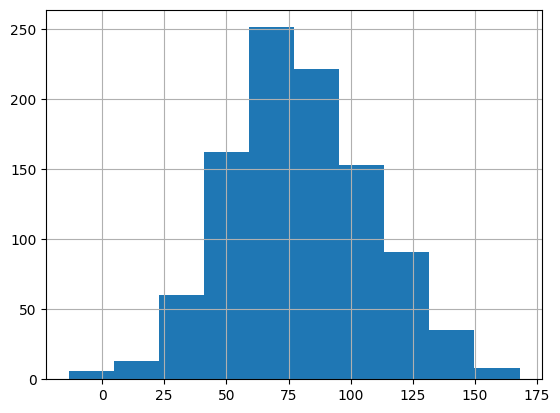

In [17]:
sample_mean_distribution.hist()

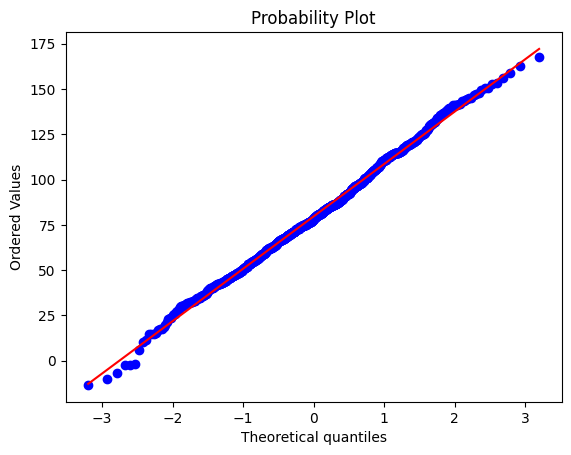

In [18]:
st.probplot(sample_mean_distribution, dist="norm", plot=pylab)
pylab.show()

In [19]:
stat, p = levene(control_group, test_group, center='mean')
p

0.006673964411583261

In [20]:
gg = pd.Series(dtype='float64')
for i in df_for_control_group['clocks_list_new']:
    gg = pd.concat([gg, pd.Series(i)], ignore_index = True)
print(gg)

0          2.80
1          7.76
2          0.88
3          2.56
4         22.32
         ...   
8304     104.72
8305       5.56
8306       5.00
8307       7.77
8308    2361.74
Length: 8309, dtype: float64


In [91]:
    def levene_test(df_for_control_group: pd.DataFrame,
        df_for_test_group: pd.DataFrame) -> pd.DataFrame:
        result = pd.DataFrame(columns=[
                'levene_p_value_list'])

        df_for_test_group['clocks_list_new'] = \
        [ast.literal_eval(i) for i in df_for_test_group['clocks_list']]
        df_for_control_group['clocks_list_new'] = \
        [ast.literal_eval(i) for i in df_for_control_group['clocks_list']]
        test_group = df_for_test_group['clocks_list_new']
        control_group = df_for_control_group['clocks_list_new']

        for i in test_group:
            levene_p_value_list = []
            for k in control_group:
                stat, p = levene(k, i, center='mean')
                levene_p_value_list.append(round(p, 3))
            columns = {'levene_p_value_list': str(levene_p_value_list)}
            df = pd.DataFrame(data=columns, index=[0])
            result = \
            pd.concat([result, \
                df], ignore_index=True , join="outer")

        result['levene_p_value_list'] = \
        [ast.literal_eval(i) for i in result['levene_p_value_list']]

        leven_median = []
        for i in result['levene_p_value_list']:
            leven_median.append(np.median(i))
        result['levene_p_value_median'] = leven_median
        result['game_id'] = df_for_test_group['game_id']

        return result

In [93]:
leven = levene_test(df_for_control_group, df_for_test_group)
leven

,levene_p_value_list,levene_p_value_median,game_id
0,"[0.007, 0.047, 0.065, 0.083, 0.0, 0.002, 0.023...",0.0415,oUAgcjiN
1,"[0.016, 0.058, 0.086, 0.102, 0.002, 0.006, 0.0...",0.0565,bQZff8t4
2,"[0.0, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.091, 0...",0.0005,h0sbNGGK
3,"[0.094, 0.56, 0.554, 0.669, 0.006, 0.09, 0.337...",0.3635,PObmYKgw
4,"[0.167, 0.756, 0.737, 0.863, 0.014, 0.195, 0.5...",0.4560,9UbP1n9S
5,"[0.118, 0.866, 0.68, 0.473, 0.0, 0.25, 0.76, 0...",0.3015,0Na0ISgm
6,"[0.004, 0.313, 0.136, 0.223, 0.0, 0.014, 0.154...",0.2060,gIp3K3P6
7,"[0.017, 0.067, 0.094, 0.112, 0.002, 0.007, 0.0...",0.0650,3bxWGDdv
8,"[0.012, 0.052, 0.075, 0.091, 0.001, 0.004, 0.0...",0.0500,S8h0gffE


In [68]:
ttt = pd.Series
print(ttt)

<class 'pandas.core.series.Series'>


In [32]:
mean_a = control_group.mean()
mean_b = test_group.mean()
es = (mean_b - mean_a) / all_data.std()

In [33]:
mean_b

99.91553977272724

In [34]:
mean_a

32.67910714285714

In [35]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/4)

1294.6495319074354

In [36]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=4/1)

323.66238283045044

In [22]:
n = 10000
result = []
for _ in tqdm(range(n)):
  control = control_group
  test = test_group
  _, pval = ttest_ind(control, test, equal_var=False)
  result.append(pval)

100%|██████████| 10000/10000 [00:05<00:00, 1855.46it/s]


In [23]:
t = pd.Series(result)
(t < 0.05).mean()

0.0

In [24]:
t.mean()

0.1097703989790997

In [97]:
d = {'clocks_list': df_for_test_group['clocks_list_new'][26], 'move_score': df_for_test_group['move_score_new'][26]}
df = pd.DataFrame(data=d)

In [106]:
t = df[['clocks_list', 'move_score']]

    clocks_list  move_score
0          0.56          21
1          1.12           0
2          1.44           9
3         25.84           0
4         11.12          35
5          2.80          39
6          5.12          29
7          2.24          23
8         13.68          37
9         14.88          46
10         5.60          71
11         2.08          12
12         6.56          58
13         4.16          28
14         2.00         154
15         4.00         148
16        20.72          30
17         9.28          16
18         1.60         -20
19         2.72         -14
20         4.48           0
21         8.08           8
22         2.96           0
23         4.56         -53
24         2.24           0
25        14.64         -71
26         2.72        -108
27         1.20         -93
28         1.12        -159
29         3.84        -214
30         1.92        -253
31         1.28        -299
32         2.16        -277
33         4.32        -288
34         8.56     

In [99]:
phik_overview = t.phik_matrix()

interval columns not set, guessing: ['clocks_list', 'move_score']


<Axes: >

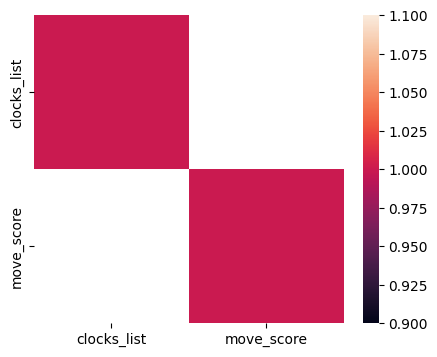

In [100]:
plt.figure(figsize = (5,4))
sns.heatmap(phik_overview)

In [113]:
def add_correlation_coefficient(
    df_for_satatistical_test: pd.DataFrame) -> pd.Series:

    len_df = df_for_satatistical_test.shape[0]
    list_df_len = list(range(0,len_df,1))
    correlation_list = []

    for i in list_df_len:
        len_clocks = len(df_for_satatistical_test['clocks_list_new'][i])
        len_score = len(df_for_satatistical_test['move_score_new'][i])
        if len_clocks != len_score:
            if len_clocks < len_score:
                df_for_satatistical_test['clocks_list_new'][i] \
                    .append(df_for_satatistical_test['clocks_list_new'][i][-1])
            else:
                df_for_satatistical_test['move_score_new'][i] \
                    .append(df_for_satatistical_test['move_score_new'][i][-1])
        else:
            d = {
                'clocks_list': df_for_satatistical_test['clocks_list_new'][i],
                'move_score': df_for_satatistical_test['move_score_new'][i]}
            df = pd.DataFrame(data=d)
            t = df[['clocks_list', 'move_score']]
            phik_overview = t.phik_matrix()
            correlation_coefficient = phik_overview['clocks_list'][1]
            correlation_list.append(correlation_coefficient)
    result = pd.Series(correlation_list)
    return result

In [117]:
rd = add_correlation_coefficient(df_for_test_group)
df_for_test_group['correlation_coefficient'] = rd

interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval c